In [ ]:
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4

数据科学是 OSEMN
----

根据一个流行的模型，数据科学的元素组成如下：

- Obtaining data
- Scrubbing data
- Exploring data
- Modeling data
- iNterpreting data

所以首字母缩写就成了 OSEMN，发音大概类似"Awesome"（英文牛X的意思）。

本章主要覆盖的是 O 和 S（也就是数据的获取和简单处理）这两部分，在复杂的数据分析工作当中，这部分内容大概占据了你总体工作时间的50-80%。

获取数据（Obtaining data）
----

数据的来源很多，比如临床试验、科学实验、调查工作、网页、计算机模拟等等。存储数据的方法也很多，接下来最开始这一步的挑战就是如何简单地实现读取数据以用于后续的分析。


### 纯文本文件

对于纯文本文件，我们可以用`open` 函数就能打开。这种格式很常见也很灵活，但由于没有什么高级结构，所以可能就需要构建处理方法来提取其中的信息。

**样例 1**: 假如我们要查找在《爱丽丝奇境漫游》这本书中， alic 和 drink 这两个词同时出现在一句话中的次数。

In [35]:
# 首先要从古登堡计划网站来下载这本书

import os
if not os.path.exists('alice.txt'):
    ! wget http://www.gutenberg.org/cache/epub/11/pg11.txt -O alice.txt

In [3]:
# 然后把这本书读取到内存中，删除其中的空白行，并且全部转换为小写字母
alice = open('alice.txt', 'r').read().replace('\r\n', '').lower()

In [4]:
# 切分成一个个句子
# 这里就简单假设每个句子的结尾都可能是 '.', '?' 或者'!'
import re

stop_pattern = '\.|\?|\!'
sentences = re.split(stop_pattern, alice)

In [5]:
# 找到同时包含'alice'和'drink'的句子

print

for i, sentence in enumerate(sentences):
    if 'alice' in sentence and 'drink' in sentence:
        print i, sentence, '\n'


66 there seemed to be no use in waiting by the little door, so she wentback to the table, half hoping she might find another key on it, or atany rate a book of rules for shutting people up like telescopes: thistime she found a little bottle on it, ('which certainly was not herebefore,' said alice,) and round the neck of the bottle was a paperlabel, with the words 'drink me' beautifully printed on it in largeletters 

67 it was all very well to say 'drink me,' but the wise little alice wasnot going to do that in a hurry 

469  alice looked all round her atthe flowers and the blades of grass, but she did not see anything thatlooked like the right thing to eat or drink under the circumstances 

882 ' said alice, who always took a great interest inquestions of eating and drinking 



### 带分隔符的文件（Delimited files）

纯文本其实也可以增加一种分割结构——一般就成了一个有行和列的表格，其中的每一列都是用同一种分隔符来分开的，通常就是逗号（csv文件）或者制表符tab。这种文件中可能会有额外的备注或者一个标题行，也可能没有。

In [6]:
%%file example.csv
# 这是一个备注
# 这是另一个备注
alice,60,1.56
bob,72,1.75
david,84,1.82

Overwriting example.csv


In [7]:
# 逐行读取解译
import csv

with open('example.csv') as f:
    # 使用一个生成器表达式（generator expression）来删除全部备注
    for line in csv.reader(row for row in f if not row.startswith('#')):
        name, wt, ht = line
        wt, ht = map(float, (wt, ht))
        print 'BMI of %s = %.2f' % (name, wt/(ht*ht))

BMI of alice = 24.65
BMI of bob = 23.51
BMI of david = 25.36


In [8]:
# 把CSV文件读取成一个 Pandas 的 Dataframe 通常是最方便的选择

import pandas as pd

df = pd.read_csv('example.csv', comment='#', header=None)
df.columns = ['name', 'wt', 'ht']
df['bmi'] = df['wt']/(df['ht']*df['ht'])
df

,name,wt,ht,bmi
0,alice,60,1.56,24.654832
1,bob,72,1.75,23.510204
2,david,84,1.82,25.359256


### JSON 文件

JSON 是对 JavaScript Object Notation 的缩写- 这个格式在基于网络的资源分享中广泛使用。其结构与Python 网状多层字典非常相似。下面是一个样例，来自http://json.org/example

In [9]:
%%file example.json
{
    "glossary": {
        "title": "example glossary",
		"GlossDiv": {
            "title": "S",
			"GlossList": {
                "GlossEntry": {
                    "ID": "SGML",
					"SortAs": "SGML",
					"GlossTerm": "Standard Generalized Markup Language",
					"Acronym": "SGML",
					"Abbrev": "ISO 8879:1986",
					"GlossDef": {
                        "para": "A meta-markup language, used to create markup languages such as DocBook.",
						"GlossSeeAlso": ["GML", "XML"]
                    },
					"GlossSee": "markup"
                }
            }
        }
    }
}

Overwriting example.json


In [10]:
import json
data = json.load(open('example.json'))

In [11]:
# data 现在就成了一个 网状的 Python 字典
data

{u'glossary': {u'GlossDiv': {u'GlossList': {u'GlossEntry': {u'Abbrev': u'ISO 8879:1986',
     u'Acronym': u'SGML',
     u'GlossDef': {u'GlossSeeAlso': [u'GML', u'XML'],
      u'para': u'A meta-markup language, used to create markup languages such as DocBook.'},
     u'GlossSee': u'markup',
     u'GlossTerm': u'Standard Generalized Markup Language',
     u'ID': u'SGML',
     u'SortAs': u'SGML'}},
   u'title': u'S'},
  u'title': u'example glossary'}}

In [12]:
# 然后也就可以用标准的键检索来进行解读
data['glossary']['GlossDiv']['GlossList']

{u'GlossEntry': {u'Abbrev': u'ISO 8879:1986',
  u'Acronym': u'SGML',
  u'GlossDef': {u'GlossSeeAlso': [u'GML', u'XML'],
   u'para': u'A meta-markup language, used to create markup languages such as DocBook.'},
  u'GlossSee': u'markup',
  u'GlossTerm': u'Standard Generalized Markup Language',
  u'ID': u'SGML',
  u'SortAs': u'SGML'}}

### 网页抓取

有时候可能要从网页上面抓取数据，但网页可能不一定给了这类的 API。所以这时候，就要求助于*网页抓取web scraping*

In [13]:
if not os.path.exists('dmoz'):
    ! scrapy startproject dmoz

New Scrapy project 'dmoz' created in:
    /Users/cliburn/git/sta-633/Lectures/Lecture03/dmoz

You can start your first spider with:
    cd dmoz
    scrapy genspider example example.com


In [14]:
%%file dmoz/dmoz/items.py
import scrapy

class DmozItem(scrapy.Item):
    title = scrapy.Field()
    link = scrapy.Field()
    desc = scrapy.Field()

Overwriting dmoz/dmoz/items.py


In [15]:
%%file dmoz/dmoz/spiders/dmoz_spider.py
import scrapy

from dmoz.items import DmozItem

class DmozSpider(scrapy.Spider):
    name = "dmoz"
    allowed_domains = ["dmoz.org"]
    start_urls = [
        "http://www.dmoz.org/Computers/Programming/Languages/Python/Books/",
        "http://www.dmoz.org/Computers/Programming/Languages/Python/Resources/"
    ]

    def parse(self, response):
        for sel in response.xpath('//ul/li'):
            item = DmozItem()
            item['title'] = sel.xpath('a/text()').extract()
            item['link'] = sel.xpath('a/@href').extract()
            item['desc'] = sel.xpath('text()').extract()
            yield item

Writing dmoz/dmoz/spiders/dmoz_spider.py


In [16]:
%%bash
cd dmoz
scrapy crawl dmoz --nolog -o scraped_data.json

In [17]:
dmoz = json.load(open('dmoz/scraped_data.json'))
for item in dmoz:
    if item['title'] and item['link']:
        if item['link'][0].startswith('http'):
            print '%s: %s' % (item['title'][0], item['link'][0])

eff-bot's Daily Python URL: http://www.pythonware.com/daily/
Free Python and Zope Hosting Directory: http://www.oinko.net/freepython/
O'Reilly Python Center: http://oreilly.com/python/
Python Developer's Guide: https://www.python.org/dev/
Social Bug: http://win32com.goermezer.de/
Core Python Programming: http://www.pearsonhighered.com/educator/academic/product/0,,0130260363,00%2Ben-USS_01DBC.html
Data Structures and Algorithms with Object-Oriented Design Patterns in Python: http://www.brpreiss.com/books/opus7/html/book.html
Dive Into Python 3: http://www.diveintopython.net/
Foundations of Python Network Programming: http://rhodesmill.org/brandon/2011/foundations-of-python-network-programming/
Free Python books: http://www.techbooksforfree.com/perlpython.shtml
FreeTechBooks: Python Scripting Language: http://www.freetechbooks.com/python-f6.html
How to Think Like a Computer Scientist: Learning with Python: http://greenteapress.com/thinkpython/
An Introduction to Python: http://www.networ

### HDF5

HDF5 是一种层次化的格式（hierarchical format），经常用于存储复杂的科学数据。例如 MATLAB 就是用这个格式来存储数据。在存储带有关联的元数据（metadata）的复杂层次化数据的时候，这个格式非常有用，例如计算机模拟实验的运算结果等等。

与HDF5 相关的主要概念有以下几个：

- 文件 file: 层次化数据的容器，相当于树根（'root' for tree）
- 组 group: 树的一个节点（node for a tree）
- 数据集 dataset: 数值数据的数组，可以非常非常大
- 属性 attribute: 提供额外信息的小块的元数据

In [37]:
import h5py
import numpy as np

In [38]:
# 创建一个 HDF5 文件
import datetime

if not os.path.exists('example.hdf5'):

    with h5py.File('example.hdf5') as f:
        project = f.create_group('project')
        project.attrs.create('name', 'My project')
        project.attrs.create('date', str(datetime.date.today()))

        expt1 = project.create_group('expt1')
        expt2 = project.create_group('expt2')
        expt1.create_dataset('counts', (100,), dtype='i')
        expt2.create_dataset('values', (1000,), dtype='f')

        expt1['counts'][:] = range(100)
        expt2['values'][:] = np.random.random(1000)

In [21]:
with h5py.File('example.hdf5') as f:
    project = f['project']
    print project.attrs['name']
    print project.attrs['date']
    print project['expt1']['counts'][:10]
    print project['expt2']['values'][:10]

My project
2014-12-14
[0 1 2 3 4 5 6 7 8 9]
[ 0.32014543  0.11704984  0.65187019  0.14567013  0.46451932  0.09365281
  0.47499692  0.90406698  0.40982306  0.48287627]


### 关系型数据库

关系型数据库（Relational databases）是由各种表组成的，每一行都有一个列组成的元组。每一行都有一个唯一的 *主键 primary key*, 而各个表示的链接则通过 *外键？foreign keys*.

我们将通过在[Chinook database](http://chinookdatabase.codeplex.com/)中查询来展示一下这些表的概念。 From the online description, "The Chinook data model represents a digital media store, including tables for artists, albums, media tracks, invoices and customers."

其在线描述中说： "The Chinook data model represents a digital media store, including tables for artists, albums, media tracks, invoices and customers."意思大概是他们这个数据模型表示了一种数据存储方式，包括了艺术家、专辑、媒体追踪、票劵和顾客等等的数据。

In [22]:
from IPython.display import Image

Image(url='http://lh4.ggpht.com/_oKo6zFhdD98/SWFPtyfHJFI/AAAAAAAAAMc/GdrlzeBNsZM/s800/ChinookDatabaseSchema1.1.png')

In [23]:
import sqlite3

# 首先是连接到数据库，然后等出现了那个提示符，就可以执行命令了
conn = sqlite3.connect('Chinook.db')
cr = conn.cursor()

In [24]:
# 数据库中的表都是什么？
cr.execute("select name from sqlite_master where type = 'table';")
print cr.fetchall()

[(u'Album',), (u'Artist',), (u'Customer',), (u'Employee',), (u'Genre',), (u'Invoice',), (u'InvoiceLine',), (u'MediaType',), (u'Playlist',), (u'PlaylistTrack',), (u'Track',)]


In [25]:
# 专辑表 Album 的结构如何？
cr.execute("select sql from sqlite_master where type = 'table' and name = 'Album';" )
print cr.fetchone()[0]

CREATE TABLE [Album]
(
    [AlbumId] INTEGER  NOT NULL,
    [Title] NVARCHAR(160)  NOT NULL,
    [ArtistId] INTEGER  NOT NULL,
    CONSTRAINT [PK_Album] PRIMARY KEY  ([AlbumId]),
    FOREIGN KEY ([ArtistId]) REFERENCES [Artist] ([ArtistId]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)


In [26]:
# 再看看艺术家表 Artist 
cr.execute("select sql from sqlite_master where type = 'table' and name = 'Artist';" )
print cr.fetchone()[0]

CREATE TABLE [Artist]
(
    [ArtistId] INTEGER  NOT NULL,
    [Name] NVARCHAR(120),
    CONSTRAINT [PK_Artist] PRIMARY KEY  ([ArtistId])
)


In [27]:
# 列出一些元素项目
cr.execute("select * from Album limit 6")
cr.fetchall()

[(1, u'For Those About To Rock We Salute You', 1),
 (2, u'Balls to the Wall', 2),
 (3, u'Restless and Wild', 2),
 (4, u'Let There Be Rock', 1),
 (5, u'Big Ones', 3),
 (6, u'Jagged Little Pill', 4)]

In [28]:
# 找出演唱过专辑'Big Ones'的艺术家
cmd = """
select Artist.Name from Artist, Album 
where Artist.ArtistId = Album.ArtistId
and Album.Title = 'Big Ones';
"""
cr.execute(cmd)
cr.fetchall()

[(u'Aerosmith',)]

In [29]:
# 关闭掉数据库，收尾结束
cr.close()
conn.close()

整理数据
----

数据的整理（Scrubbing data）值得是对要分析的数据进行的预处理步骤。其中可能涉及到删除某些行或者列，处理确实数据，解决数据输入错误导致的不一致，转换日期格式，生成衍生变量，将不同来源的数据进行整合，等等。然而人生就是这么的悲伤，并没有一个单独的方法能够满足所有这些可能需要的数据预处理需求；不过呢，熟练使用Python 和一些下文即将展示的包，也能搞定其中大部分了。

想要了解现实世界中需要进行的工作量，可以参考[Bureau of Labor Statistics (US Government)](http://okfnlabs.org/bad-data/ex/bls-us-employment/)里面的样例。

下文我们讲的主要是一些比较简单的数据，其中的清理工作可以通过`pandas`就能完成。

In [30]:
%%file bad_data.csv
# 这是一行备注
# 这是另外一行备注
name,gender,weight,height
alice,f,60,1.56
bob,m,72,1.75
charles,m,,91
david,m,84,1.82
edgar,m,1.77,93
fanny,f,45,1.45

Overwriting bad_data.csv


In [31]:
# 加入我们要在上面的这个数据集中找出平均的体重指数Body Mass Index (BMI) 

import pandas as pd

df = pd.read_csv('bad_data.csv', comment='#')

In [32]:
df.describe()

,weight,height
count,5.000000,6.000000
mean,52.554000,31.763333
std,31.853251,46.663594
min,1.770000,1.450000
25%,45.000000,1.607500
50%,60.000000,1.785000
75%,72.000000,68.705000
max,84.000000,93.000000


有点不对劲是不是- 平均身高居然是31米！扯淡嘞~

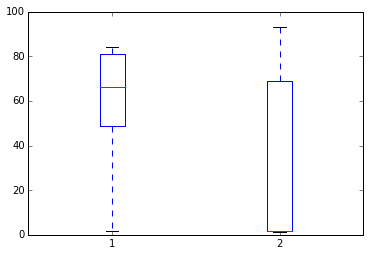

In [50]:
# 把体重和身高投图来看一看
plt.boxplot([df.weight, df.height]),;

In [52]:
df[df.height > 2]

,name,gender,weight,height
2,charles,m,NaN,91
4,edgar,m,1.77,93


In [60]:
# 很明显了，体重和身高应该是弄反了
# 那就交换回来
idx = df.height > 2
df.ix[idx, 'height'], df.ix[idx, 'weight'] = df.ix[idx, 'weight'], df.ix[idx, 'height']
df[df.height > 2]

,name,gender,weight,height


In [57]:
df

,name,gender,weight,height
0,alice,f,60,1.56
1,bob,m,72,1.75
2,charles,m,91,NaN
3,david,m,84,1.82
4,edgar,m,93,1.77
5,fanny,f,45,1.45


In [62]:
# 有的身高数据还有空缺，或许就可以通过某个关系模型来进行一些预测
# 比如结合身高体重和性别来建立个模型什么的
# 不过我们现在就直接把有空缺的行直接删除忽略掉


df['BMI'] = df['weight']/(df['height']*df['height'])
df

,name,gender,weight,height,BMI
0,alice,f,60,1.56,24.654832
1,bob,m,72,1.75,23.510204
2,charles,m,91,NaN,NaN
3,david,m,84,1.82,25.359256
4,edgar,m,93,1.77,29.684956
5,fanny,f,45,1.45,21.403092


In [63]:
# 好了，最后一步就是计算每个性别的平均 BMI了
df.groupby('gender')['BMI'].mean()

gender
f         23.028962
m         26.184806
Name: BMI, dtype: float64

<font color=red>练习</font>
----

**1**. 把下面的文本写入到一个名为"hello.txt" 的文件中，使用 `open` 和 `write`。写出的文件应该有三行
```
Hello, world.
Goodbye, cruel world.
The world is your oyster.
```

In [ ]:
# YOUR CODE HERE




**2**. 使用 for 循环以及 `open`, 读取刚刚这个'hello.txt'文件，用print 输出其中以'Hello'或者'The开头的行。

In [ ]:
# YOUR CODE HERE




**3**. 大多数情况下，表格文件都能用 pandas 里面的适当的函数来正确读取。不过有的时候，对于一个文件难免要逐行读取，比如当这个文件是从Excel表格中导出的时候。使用`csv`模块以及一个for循环，从一个`ugh.csv`文件来创建一个Pandas 的 DataFrame。

In [24]:
%%file ugh.csv
# This is a comment
# This is another comment
name,weight,height
alice, 60,1.56
bob,72,1.75
david,84,   1.82

pooh,314.2,1.4
# eeyore should be here but didn't come for follow up
rabbit, 1.2,0.6
"king Rameses, the third",85,1.82

Notes: weight is in kg 
Note: height is in meters

Overwriting ugh.csv


In [31]:
# The cleaned table should look like this
import pandas as pd
pd.read_csv('clean_ugh.csv')

,Name,Weight,Height
0,alice,60.0,60.0
1,bob,72.0,72.0
2,david,84.0,84.0
3,pooh,314.2,314.2
4,rabbit,1.2,1.2
5,"king Rameses, the third",85.0,85.0


In [47]:
# YOUR CODE HERE






**4**. 给定一个HDF5文件 'mystery.hdf5'，对其中`simulation`的子组 `expt`中的数据集`evetns`投一个直方图。 设置这个图的标题为 'name (date)'，其中的name 和 date 都是`simulaiton` 这个组的对应属性值。

In [61]:
# YOUR CODE HERE

with h5py.File('mystery.hdf5') as f:
    pass




**5**. 建立一个表格，包含10个在SQLite3 数据库文件"Chinook.db"有最多音轨数目（number of tracks）的艺术家。考虑到要掌握SQL的神秘语法可能需要花点时间，下面给提供了一个SQL查询的模板。你只需要填一下其中的 X。要知道每个语句的意思，可能需要用谷歌等搜索引擎来查一查。另外可能通过下面的图示来对"Chinook.db" 进行一点了解也会有帮助：

In [65]:
from IPython.display import Image

Image(url='http://lh4.ggpht.com/_oKo6zFhdD98/SWFPtyfHJFI/AAAAAAAAAMc/GdrlzeBNsZM/s800/ChinookDatabaseSchema1.1.png')

In [ ]:
# YOUR CODE HERE

sql = """
select X, count(X) as total 
from X, X, X 
where X = X and X = X 
group by X
order by X desc 
limit X;
"""

with sqlite3.connect('Chinook.db') as conn:
    cr = conn.cursor()
    cr.execute(sql) 
    for row in cr.fetchall():
        print row

